In [1]:
### 2 Random Walk On Networks
library('igraph')
library('Matrix')
library('pracma')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘pracma’

The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



In [2]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

freq = function (vertex_sequence, num_vertex, num_steps) {
    name = names(table(vertex_sequence))
    count = as.numeric(table(vertex_sequence))
    result = seq_len(0)
    for (i in 1:num_vertex){
        if(i %in% name){
            result = c(result, count[i]/(num_steps + 1))
        }
        else
            result = c(result, 0)
    }
    result[is.na(result)] = 0
    return(result)
}
    

In [3]:
p = 0.01
set.seed(1)
er2 <- erdos.renyi.game(1000, p, directed=F)
start = sample(1:vcount(er2), 1)
dist_matrix = distances(er2, v=V(er2), to=V(er2))
vert = random_walk(er2, 1000, start)
st = seq_len(0)
for (v in vert){
    st = c(st, dist_matrix[start, v])
}

In [4]:
print(sprintf("Avg dist is %f", mean(st)))
print(sprintf("STD is %f", sd(st)))

[1] "Avg dist is 3.143774"
[1] "STD is 0.610425"


[1] 1

In [5]:
mean_st = seq_len(0)
for(i in 1: 1000){
    mean_st = c(mean_st, mean(st[1:i]))
}

std_st = seq_len(0)
for(i in 1: 1000){
    std_st = c(std_st, sd(st[1:i]))
}

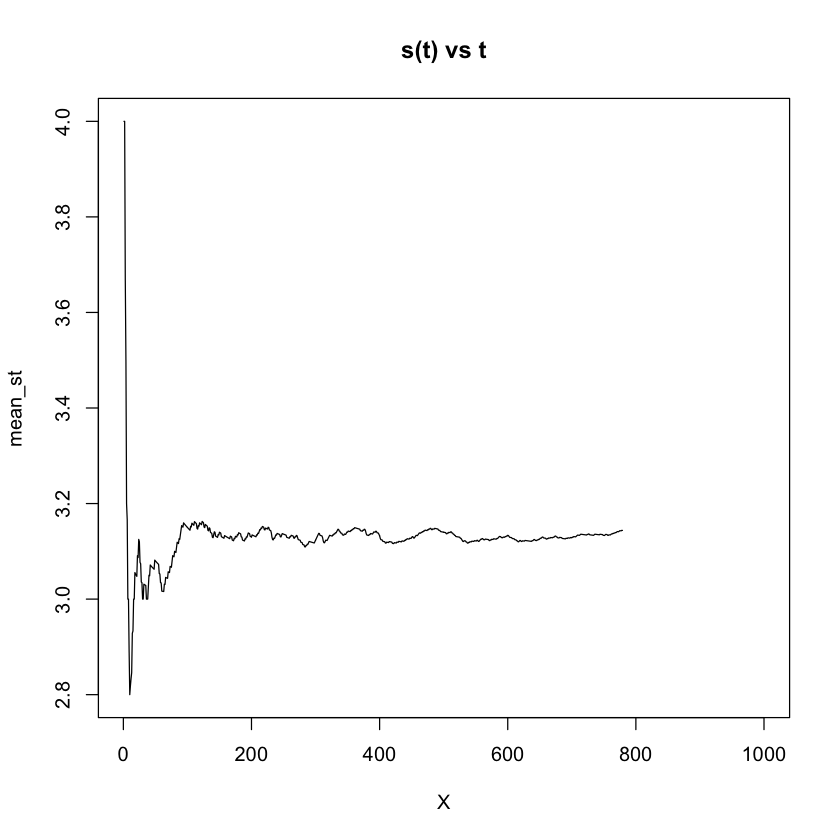

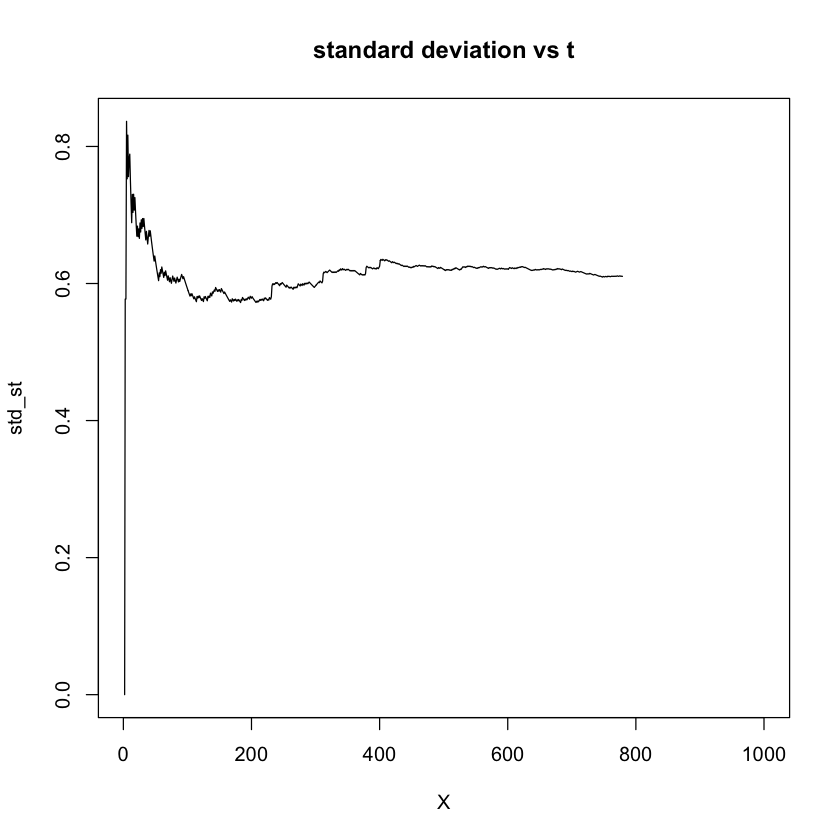

In [6]:
X = seq(1,1000)
plot(x=X, y=mean_st, main="s(t) vs t", type='l')
plot(x=X, y=std_st,  main="standard deviation vs t", type='l')

Warning message in subgraph(er2, vert):
“At structural_properties.c:1984 :igraph_subgraph is deprecated from igraph 0.6, use igraph_induced_subgraph instead”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 y value <= 0 omitted from logarithmic plot”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“2 y values <= 0 omitted from logarithmic plot”

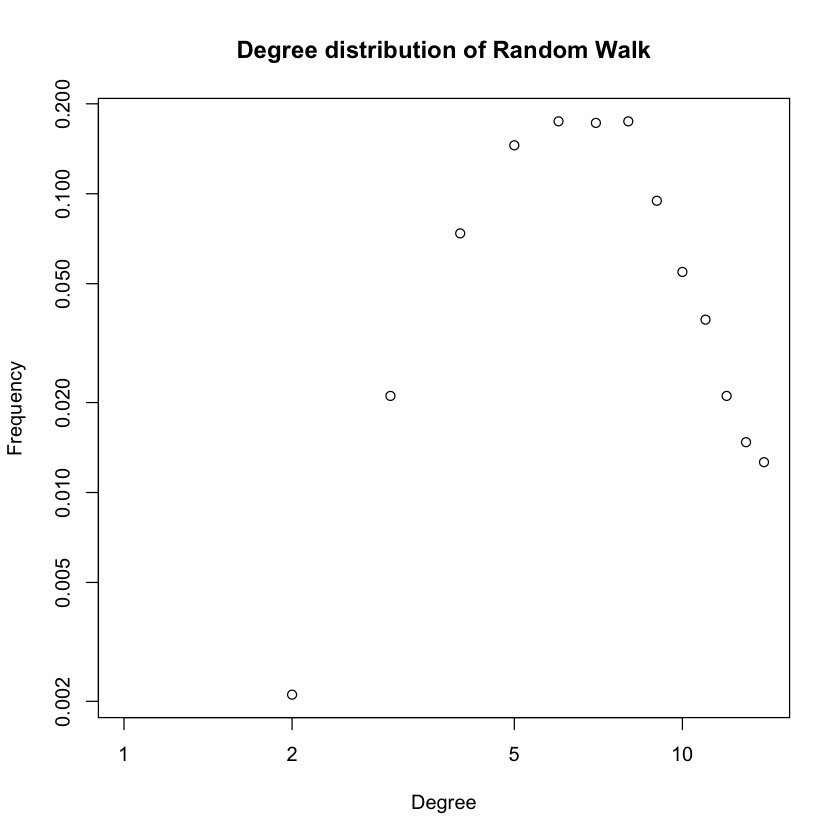

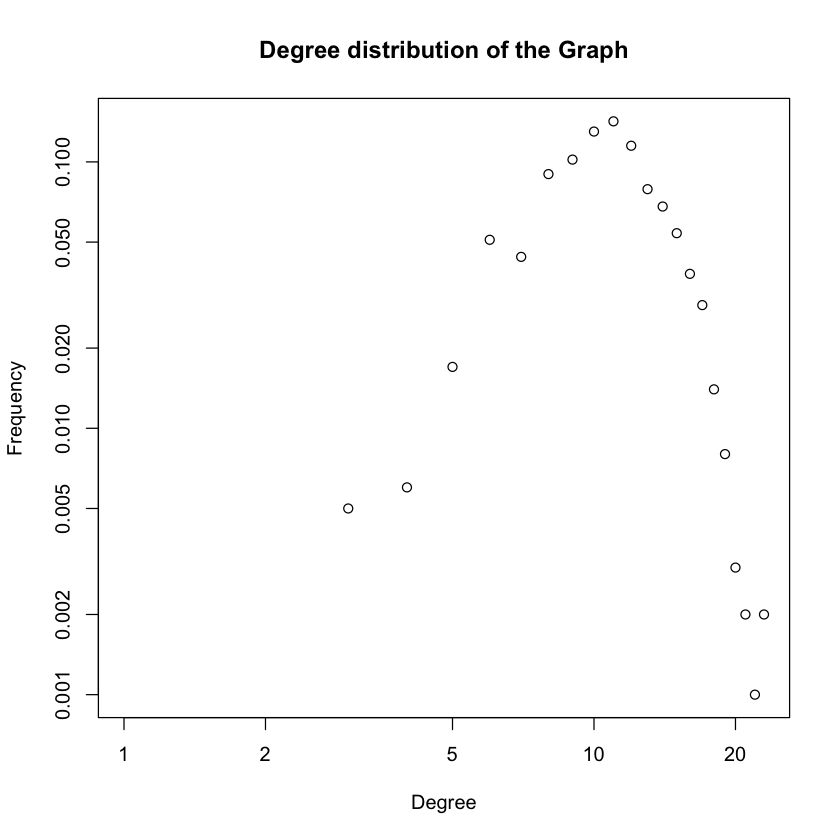

In [7]:
plot(degree.distribution(subgraph(er2, vert)),main="Degree distribution of Random Walk",xlab="Degree",ylab="Frequency", log = "xy")
plot(degree.distribution(er2),main="Degree distribution of the Graph",xlab="Degree",ylab="Frequency", log = "xy")

In [8]:
### (D) Use Different n

func21 = function (n){
    set.seed(1)
    p = 0.01
    graph <- erdos.renyi.game(n, p, directed=F)
    start = sample(1:vcount(graph), 1)
    dist_matrix = distances(graph, v=V(graph), to=V(graph))
    vert = random_walk(graph, n, start)
    st = seq_len(0)
    for (v in vert){
        st = c(st, dist_matrix[start, v])
    }
    
    mean_st = seq_len(0)
    for(i in 1: n){
        mean_st = c(mean_st, mean(st[1:i]))
    }

    std_st = seq_len(0)
    for(i in 1: n){
        std_st = c(std_st, sd(st[1:i]))
    }

    X = seq(1,n)
    plot(x=X, y=mean_st, main="s(t) vs t", type='l')
    plot(x=X, y=std_st,  main="standard deviation vs t", type='l')
    
    plot(degree.distribution(subgraph(graph, vert)),main=sprintf("Degree distribution of Random Walk, n=%d", n),xlab="Degree",ylab="Frequency", log = "xy")
    plot(degree.distribution(graph),main=sprintf("Degree distribution of the Graph", n),xlab="Degree",ylab="Frequency", log = "xy")
}

Warning message in subgraph(graph, vert):
“At structural_properties.c:1984 :igraph_subgraph is deprecated from igraph 0.6, use igraph_induced_subgraph instead”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 y value <= 0 omitted from logarithmic plot”

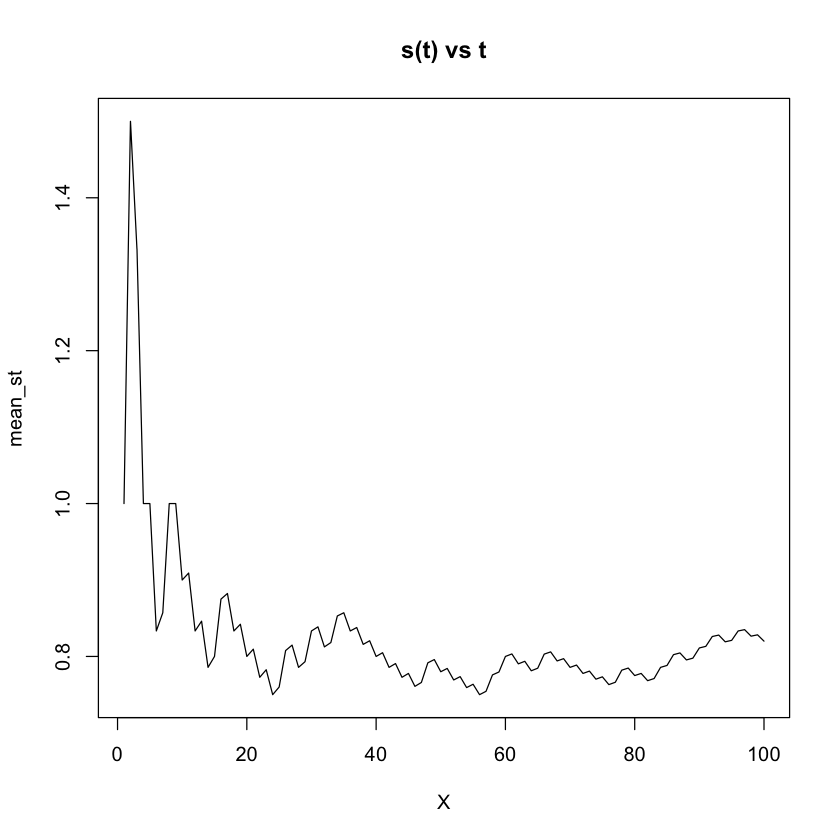

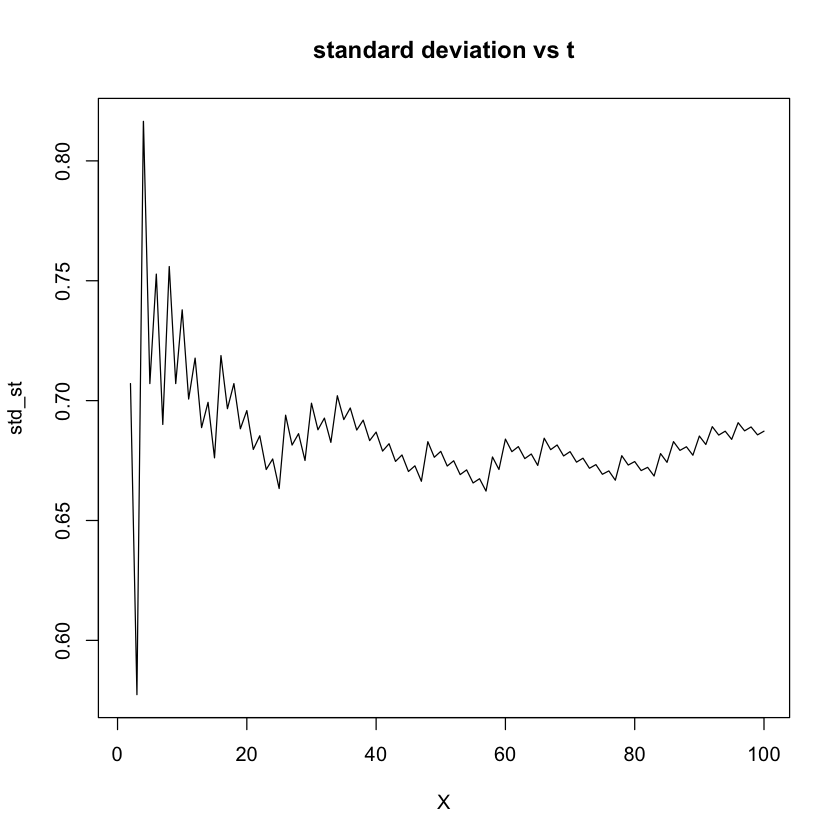

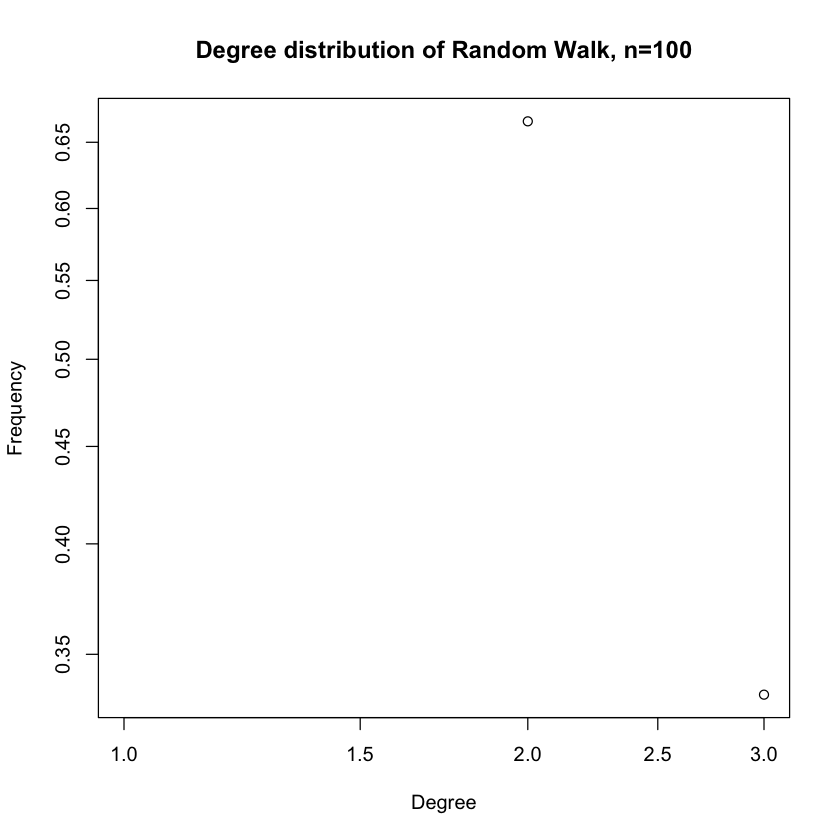

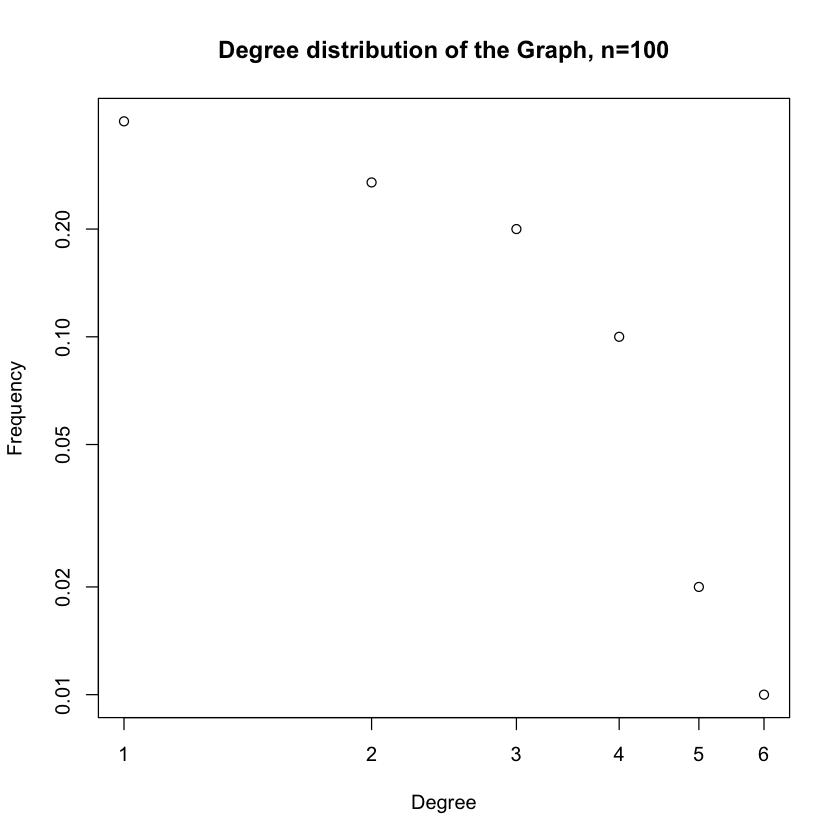

In [123]:
func21(100)

Warning message in subgraph(graph, vert):
“At structural_properties.c:1984 :igraph_subgraph is deprecated from igraph 0.6, use igraph_induced_subgraph instead”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“22 y values <= 0 omitted from logarithmic plot”

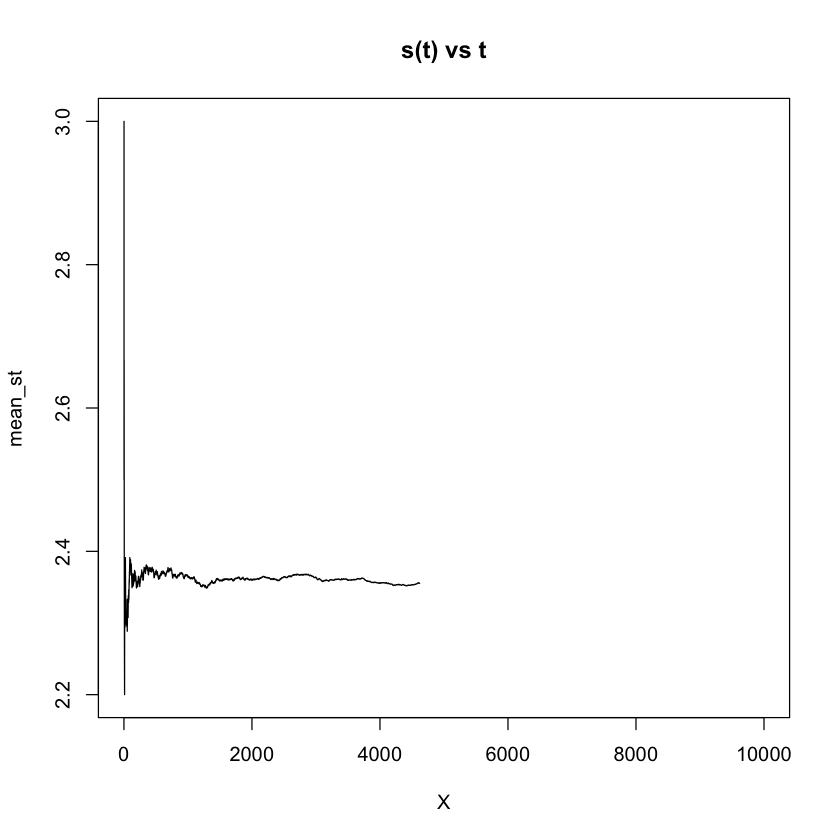

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“69 y values <= 0 omitted from logarithmic plot”

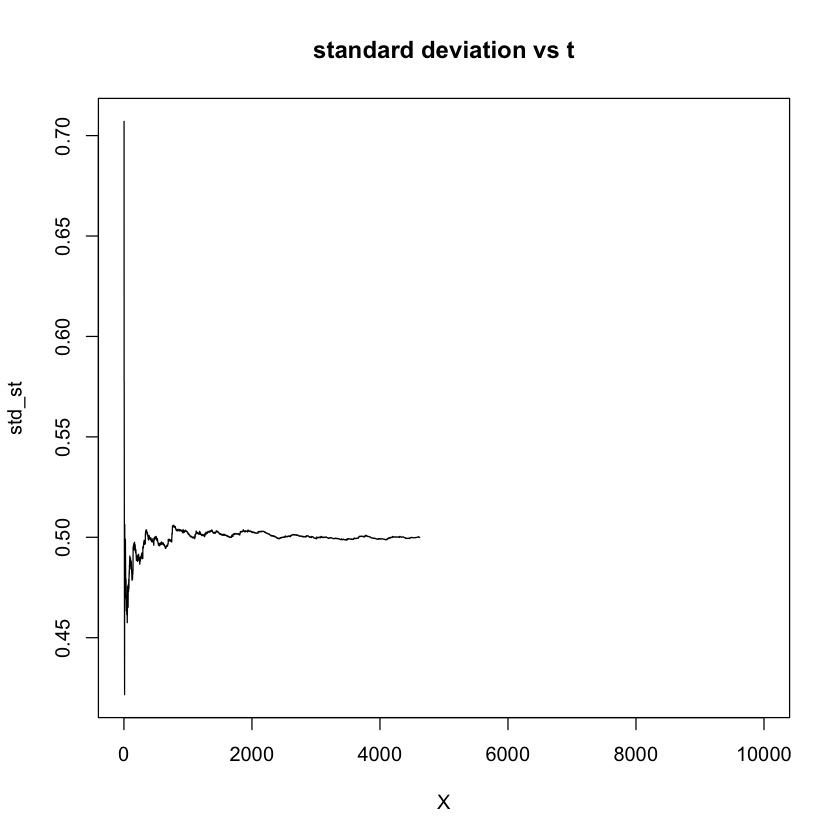

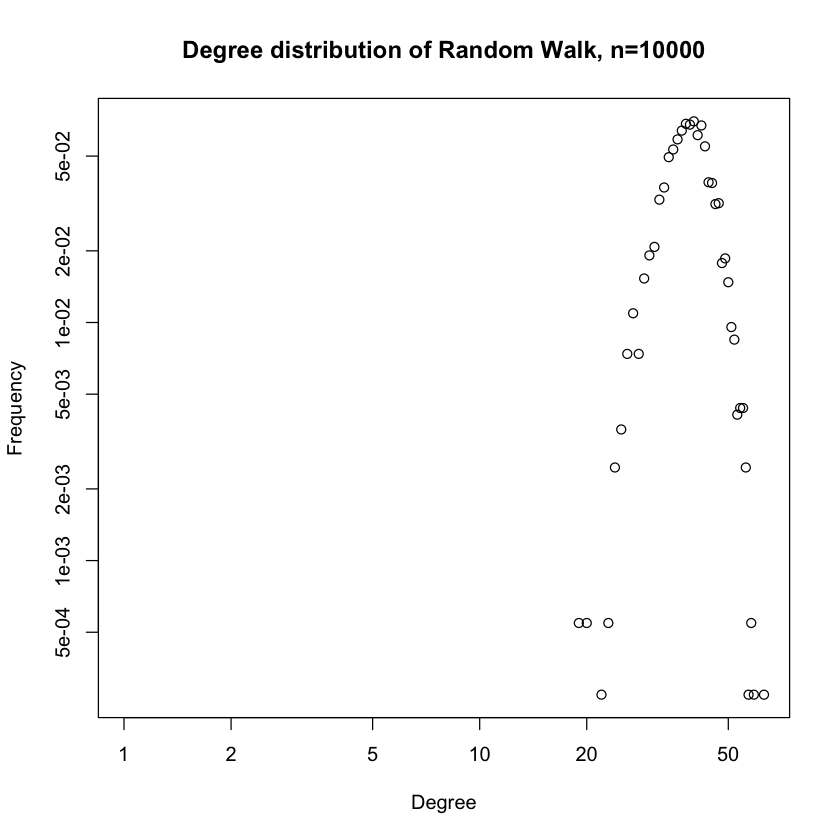

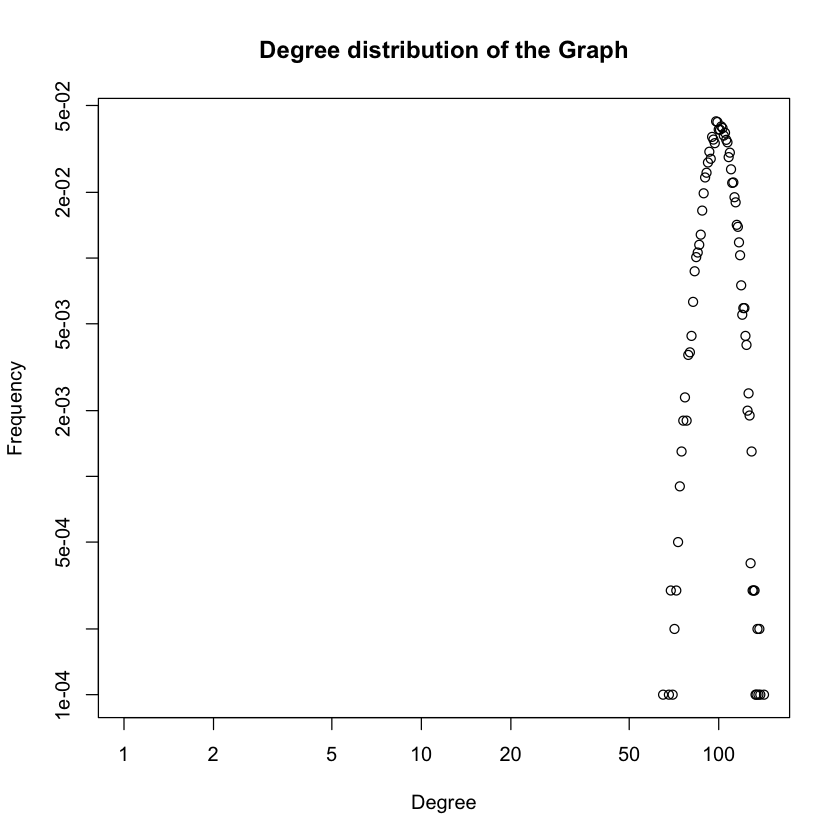

In [9]:
func21(10000)